In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

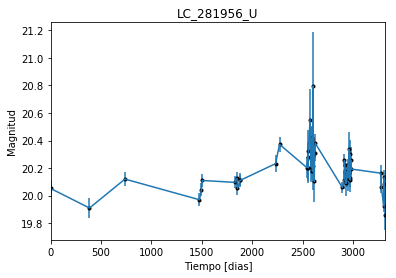

In [2]:
data = np.genfromtxt('LC_281956_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_281956_U')
plt.savefig("LC_281956_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

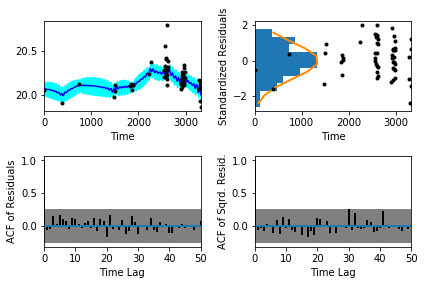

In [5]:
sample.assess_fit()

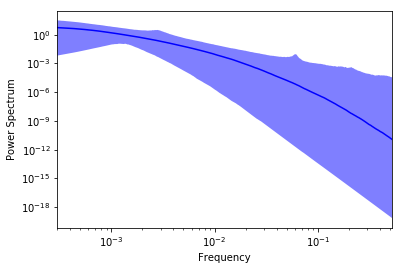

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

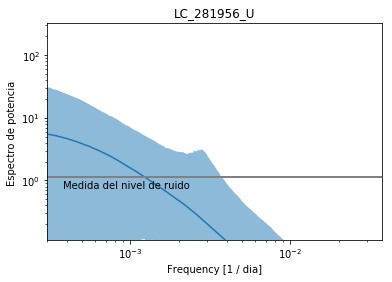

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_281956_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_281956_U')

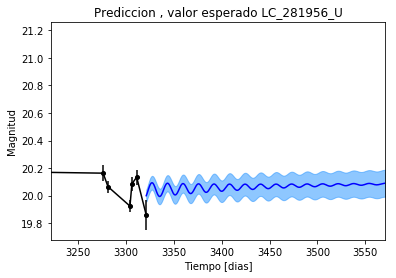

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_281956_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_281956_U')

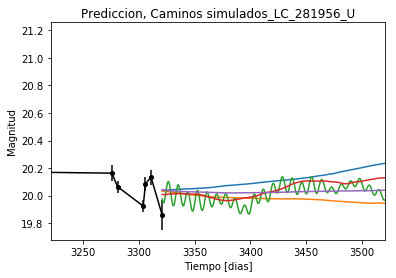

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_281956_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


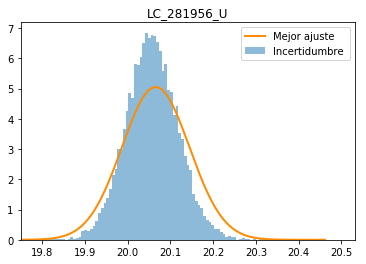

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_281956_U')
plt.savefig("Mejor_ajuste_LC_281956_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_281956_U')

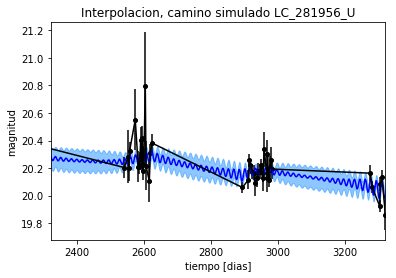

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_U')

Text(0.5,1,'Interpolacion, camino simulado LC_281956_U')

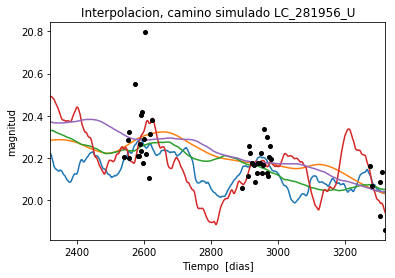

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 648.156884711
Median: 0.0104095809846
Standard deviation: 0.199588354721
68% credibility interval: [ 0.00104783  0.17741475]
95% credibility interval: [  3.69435481e-04   7.82701759e-01]
99% credibility interval: [  3.09970213e-04   9.81237362e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 503.691321572
Median: 0.0024989638256
Standard deviation: 0.0864148016629
68% credibility interval: [ 0.00052897  0.02784869]
95% credibility interval: [ 0.00032484  0.22675823]
99% credibility interval: [  3.05351941e-04   7.40577922e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 860.650160149
Median: 0.0278668866956
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1260.73026519
Median: 77.1441873104
Standard deviation: 1.65444428777
68% credibility interval: [ 75.30019068  78.25611618]
95% credibility interval: [ 72.87053292  79.62639103]
99% credibility interval: [ 70.93189768  80.63095081]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 232.096756871
Median: 0.723421192376
Standard deviation: 2.31895229106
68% credibility interval: [ 0.07689804  4.08874986]
95% credibility interval: [ 0.01807333  7.99499467]
99% credibility interval: [  0.01186613  10.63031521]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 644.718065985
Median: 0.495328645544
Standard deviation: 8.9892730828
68% credibility interval: [ 0.01406384  8.96748364]
95% credibility interval: [  6.86328599e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1154.83042433
Median: 2.5941736346e-30
Standard deviation: 2.01278989847e+133
68% credibility interval: [  2.15885087e-60   1.51541195e-09]
95% credibility interval: [  2.77221366e-134   1.00879237e+112]
99% credibility interval: [  1.03273205e-156   5.73398785e+131]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1478.56571293
Median: 20.1112934436
Standard deviation: 0.0616921171628
68% credibility interval: [ 20.05638205  20.16094684]
95% credibility interval: [ 19.97186968  20.22379158]
99% credibility interval: [ 19.90063566  20.28288696]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1079.84278592
Median: 0.0198812412623
Standard deviation: 0.232501573039
68% credibility interval: [ 0.          0.33118001]
95% credibility interval: [ 0.          0.85022804]
99% credibility interval: [ 0.          1.00807072]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1079.84278592
Median: 0.0198812412623
Standard deviation: 0.232501573039
68% credibility interval: [ 0.          0.33118001]
95% credibility interval: [ 0.          0.85022804]
99% credibility interval: [ 0.          1.00807072]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 696.307007274
Median: 0.0
Standard deviation: 0.000640236778245
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1260.73026519
Median: 77.1441873104
Standard deviation: 1.65444428777
68% credibility interval: [ 75.30019068  78.25611618]
95% credibility interval: [ 72.87053292  79.62639103]
99% credibility interval: [ 70.93189768  80.63095081]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2548.8386753
Median: 0.0137406197815
Standard deviation: 0.0177408572612
68% credibility interval: [ 0.00774512  0.02556779]
95% credibility interval: [ 0.00447138  0.0548989 ]
99% credibility interval: [ 0.00345895  0.11465799]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1416.60655404
Median: 1.14021268338
Standard deviation: 0.186986524146
68% credibility interval: [ 0.98004408  1.34419276]
95% credibility interval: [ 0.83117037  1.57162777]
99% credibility interval: [ 0.75116654  1.71379676]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 724.622076531
Median: 0.000151066218166
Standard deviation: 0.191706578967
68% credibility interval: [  7.91061558e-08   1.33083284e-02]
95% credibility interval: [  2.99088801e-115   4.00300023e-001]
99% credibility interval: [  2.65819464e-135   1.40751542e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 648.156884711
Median: (-0.0654053262964-2.02023492653j)
Standard deviation: 1.92528622311
68% credibility interval: [-1.11472974-2.76641856j -0.00658374-1.07149139j]
95% credibility interval: [ -4.91786019e+00+0.j          -2.32123159e-03-0.01742665j]
99% credibility interval: [ -6.16529617e+00-3.27885309j  -1.94760029e-03-4.39051364j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 503.691321572
Median: (-0.0157014527922+0.178201674589j)
Standard deviation: 1.5584896152
68% credibility interval: [-0.17497850+1.01342322j -0.00332362+0.00240732j]
95% credibility interval: [-1.42476398+3.59561692j -0.00204100+0.36123176j]
99% credibility interval: [ -4.65318832e+00+4.97753237j  -1.91858283e-03+0.01827356j]
Posterior summ